In [1]:
import pandas as pd
l2d = pd.read_csv('train.csv')
y = l2d['Credit Default']
l2d.drop('Credit Default',axis=1,inplace=True)

In [2]:
l2d.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000


__1.__ Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

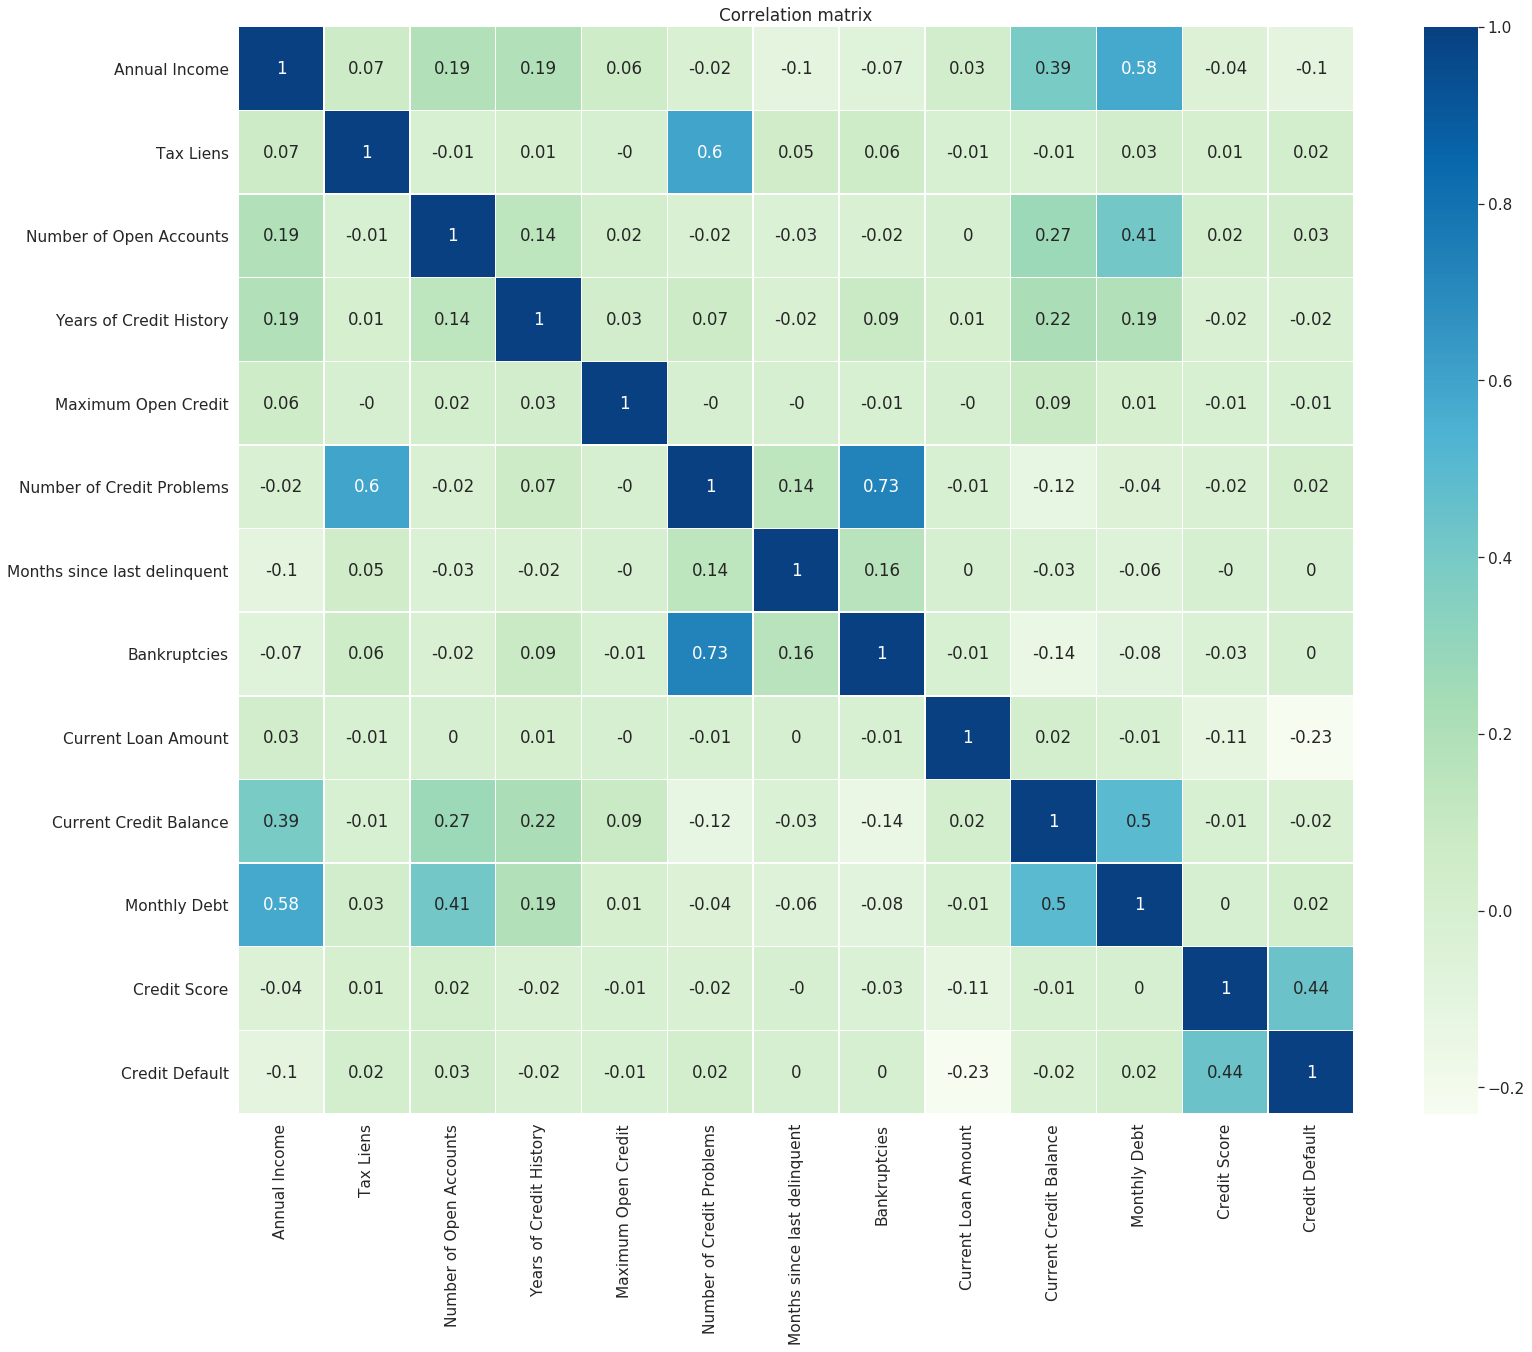

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

features_and_target = l2d.copy()
features_and_target['Credit Default'] = y

corr_matrix = features_and_target.corr()
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

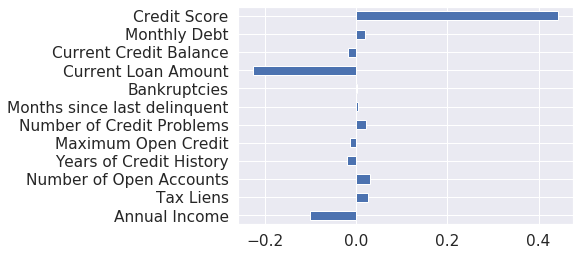

In [4]:
l2d.corrwith(y,).plot(kind='barh')

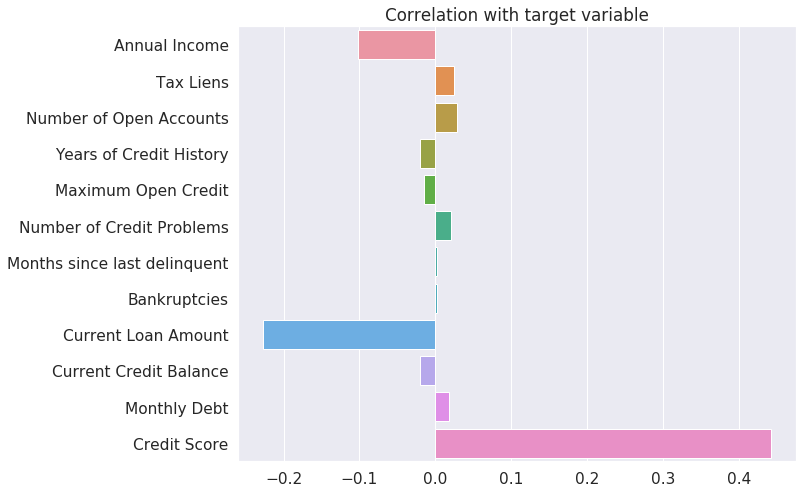

In [5]:
corr_matrix_strange = l2d.corrwith(y)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_matrix_strange.values, y=corr_matrix_strange.index)

plt.title('Correlation with target variable')
plt.show()

Выводы:
- высокая корреляция между признаком и базовым признаком отображает закономерность и позволяет выполнить подходящий прогноз;
- высокая корреляция между признаками может помешать прогнозированию, в случае слабой корреляции с базовым признаком;
- признаки "Credit Score", "Current Loan Amount", "Annual income" можно оставить без изменений при доработке остальных признаков;
- для упрощения построения модели, возможно исключить из признаков "Bunkruptcies" (от части я удивлен, что совершенно нет корреляции с базовым признаком, поэтому перед исключением необходим обязательный анализ признака) и "Months since last delinquent";
- остальные признаки проявили минимальную корреляцию, поэтому возможно поработать над ними для улучшения качества прогнозирования.

__2.__ Сравните распределения признаков из train.csv и test.csv

In [6]:
l2_train_data = l2d.copy()
l2_test_data = pd.read_csv('test.csv')

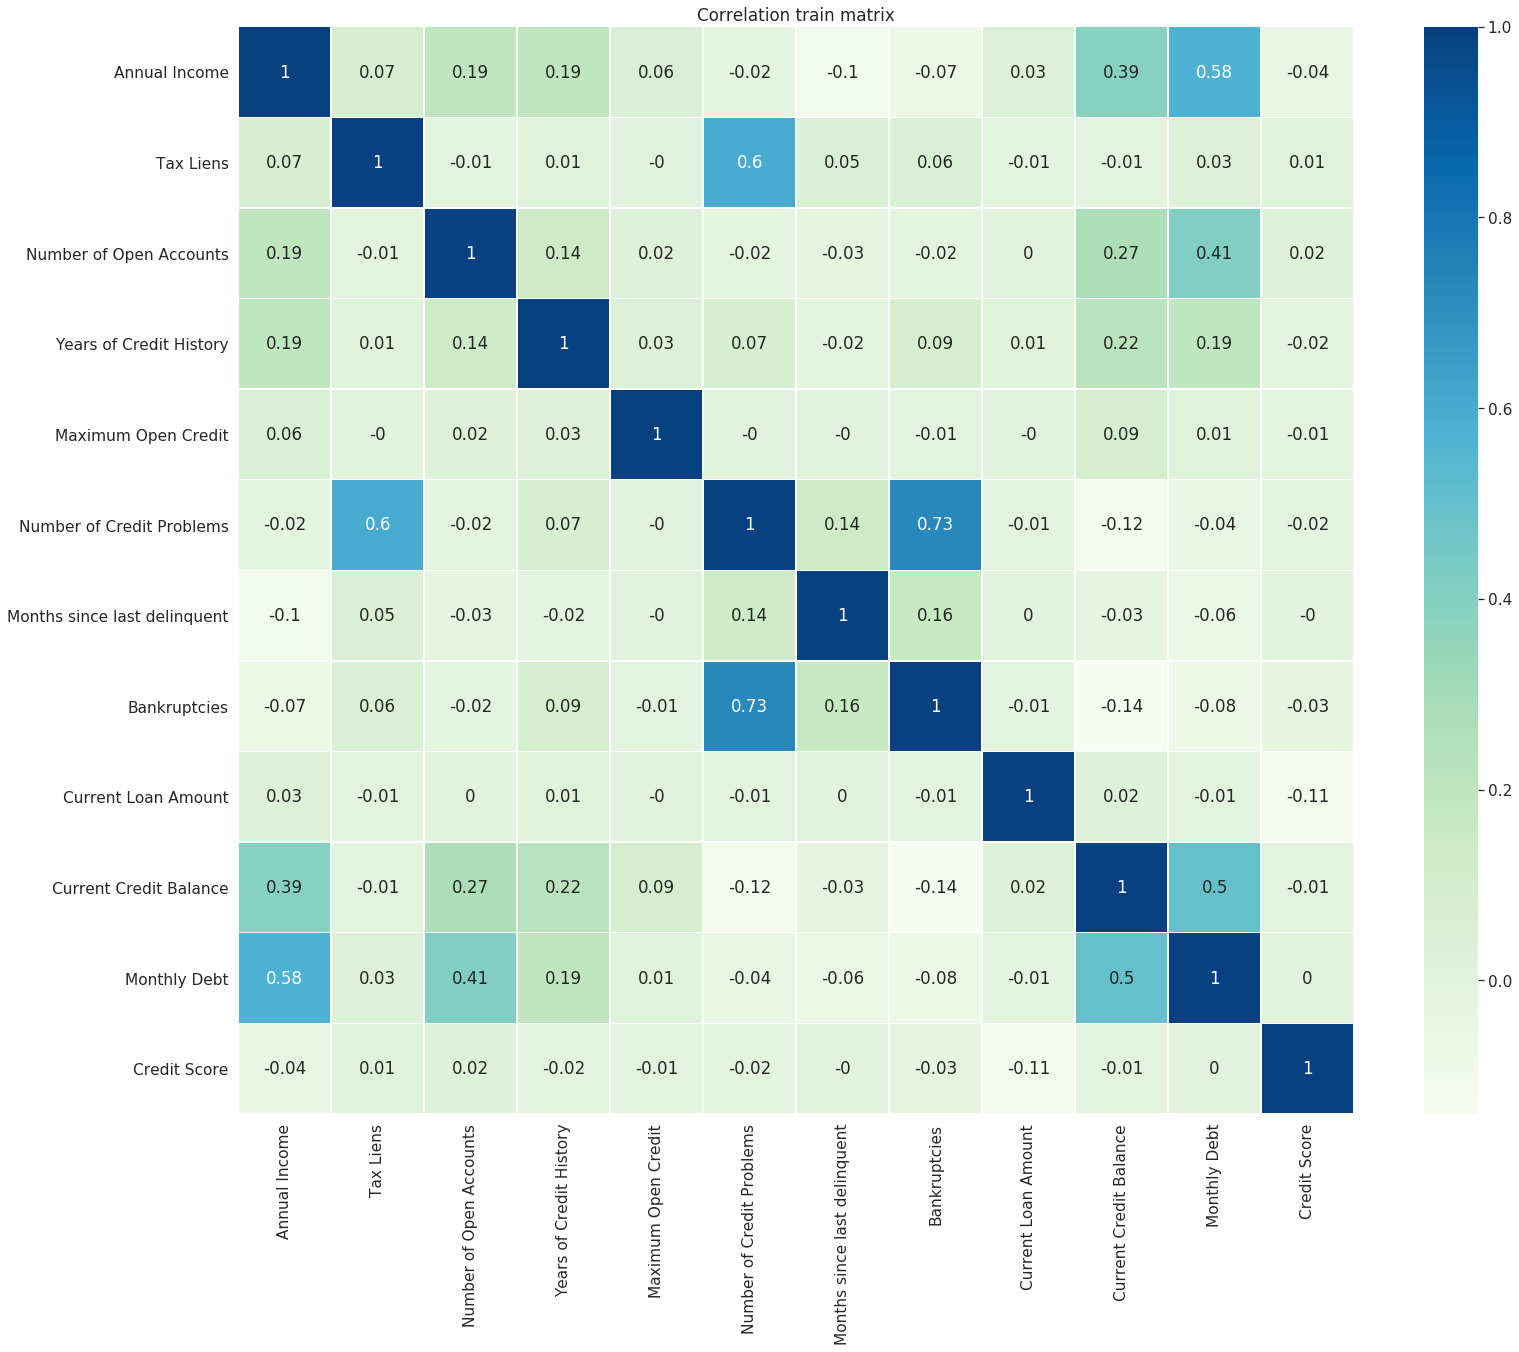

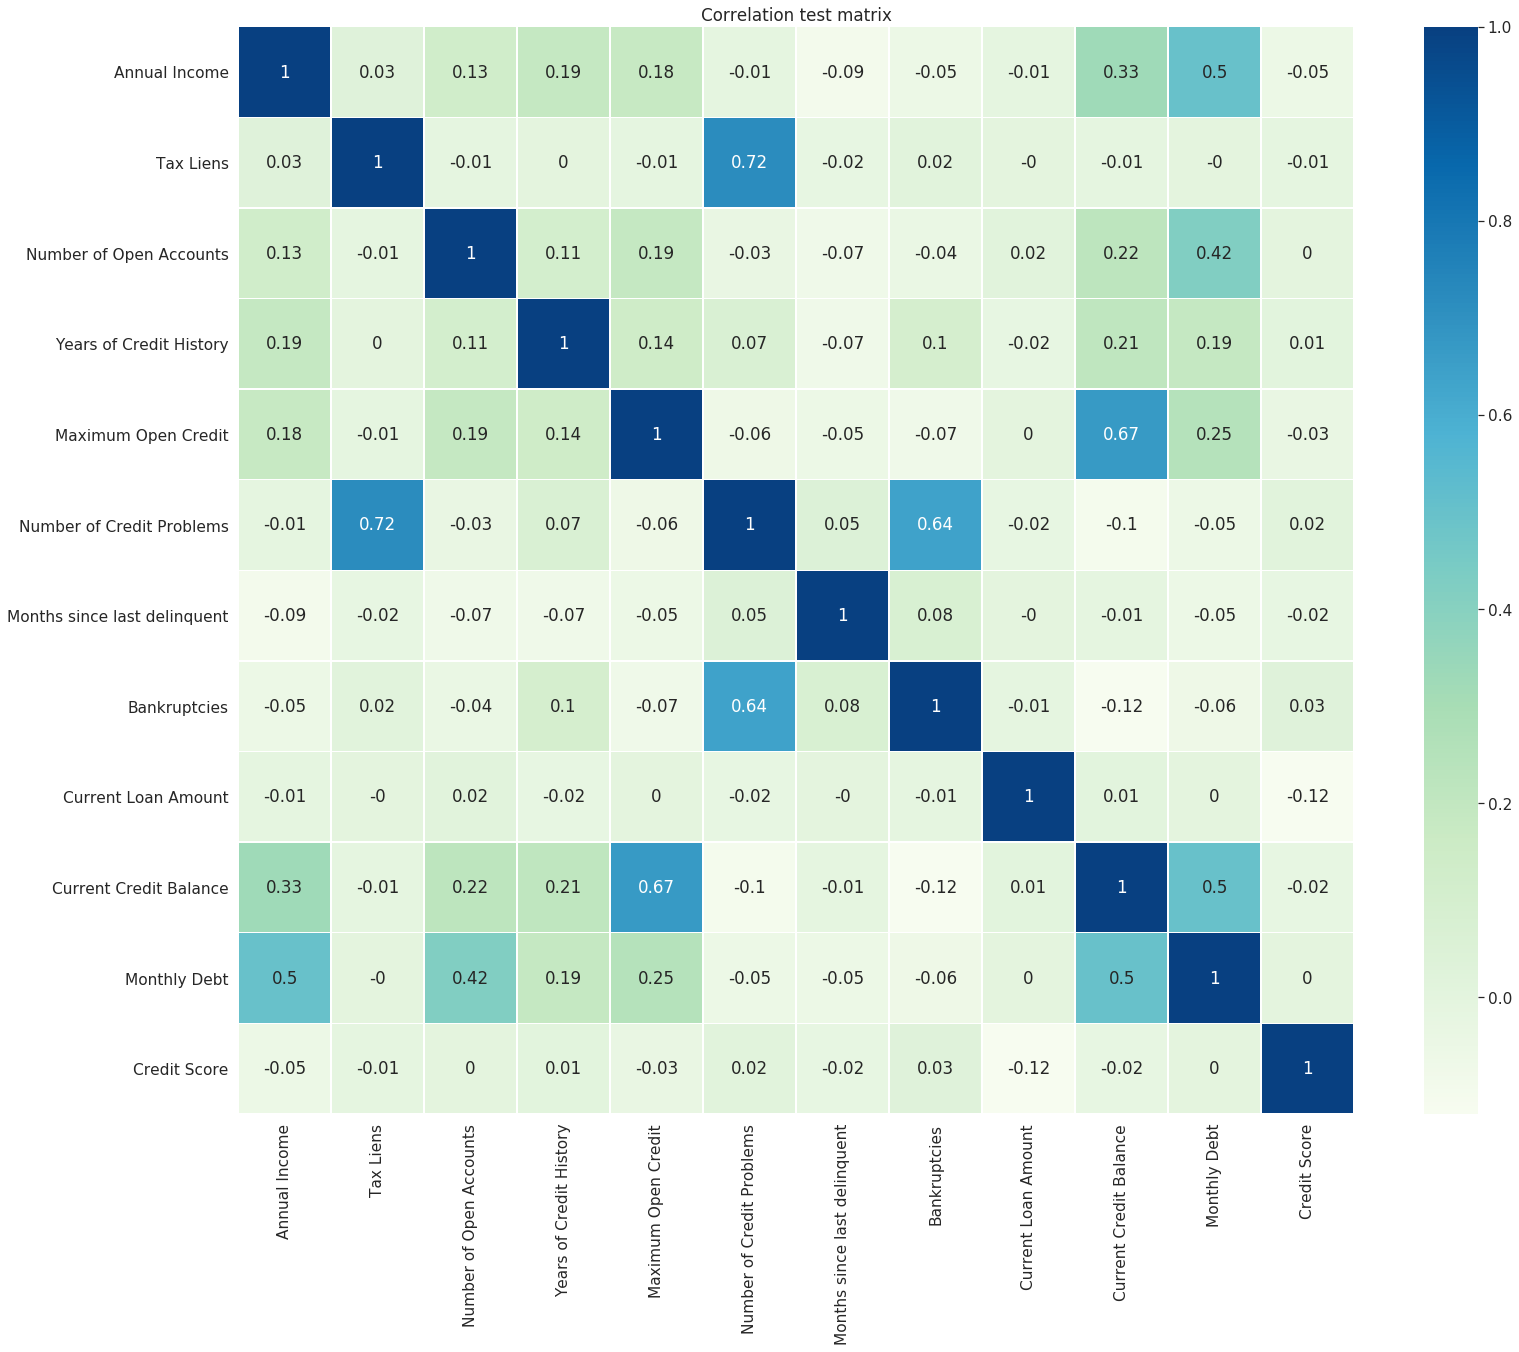

In [7]:
plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

corr_matrix = l2_train_data.corr()
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation train matrix')
plt.show()

plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

corr_matrix = l2_test_data.corr()
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation test matrix')
plt.show()

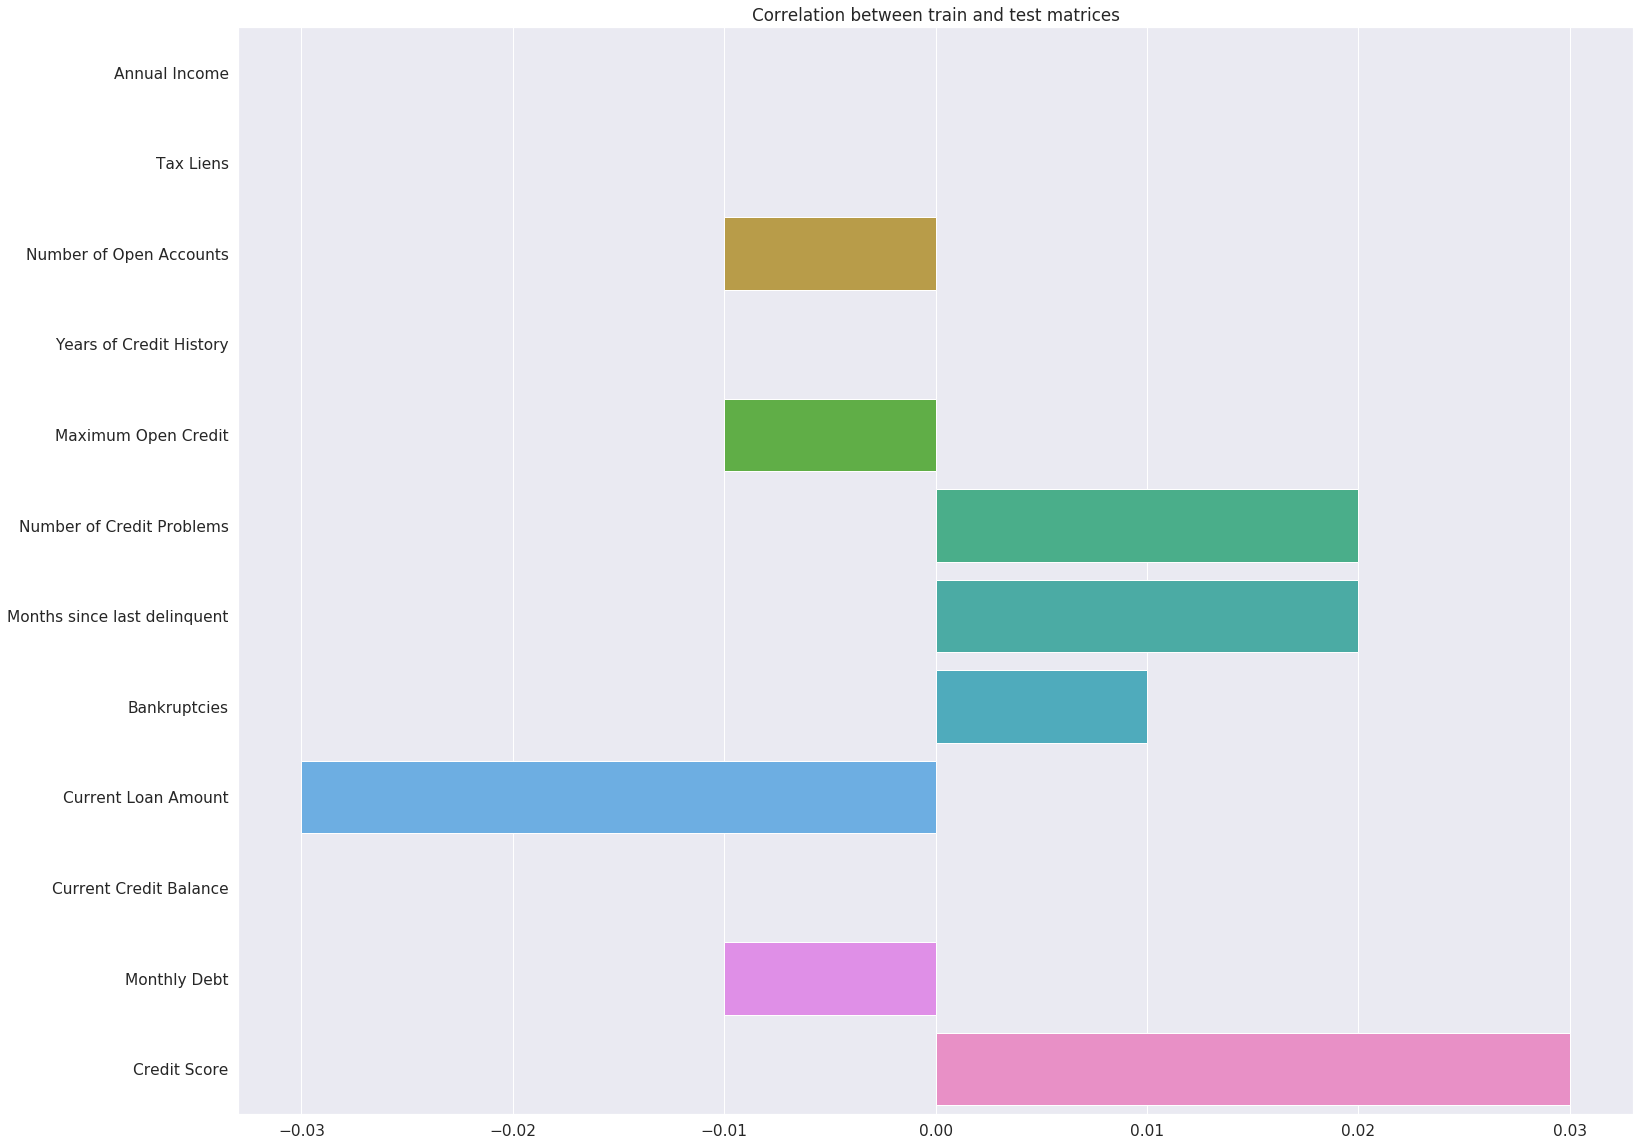

In [8]:
plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

corr_matrix = l2_train_data.corrwith(l2_test_data)
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.barplot(x=corr_matrix.values, y=corr_matrix.index)

plt.title('Correlation between train and test matrices')
plt.show()

Annual Income
MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)


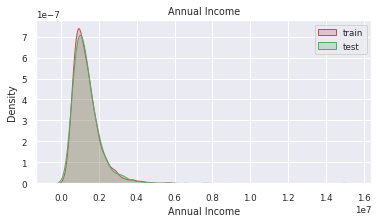

Tax Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


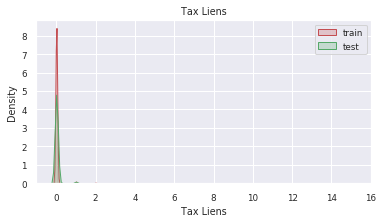

Number of Open Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


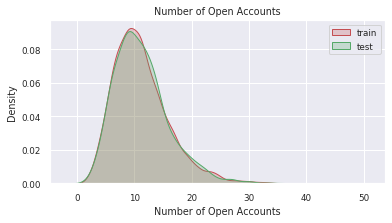

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


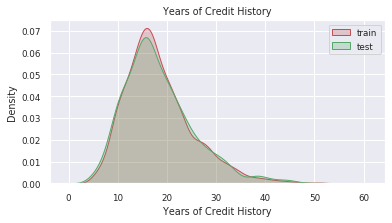

Maximum Open Credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


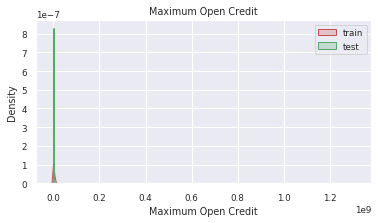

Number of Credit Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


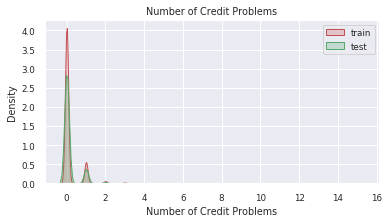

Months since last delinquent
MannwhitneyuResult(statistic=6974400.5, pvalue=1.712573746209761e-82)


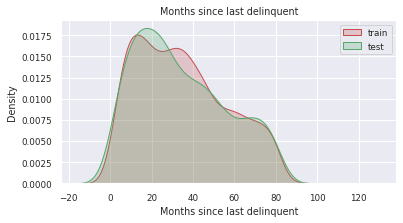

Bankruptcies
MannwhitneyuResult(statistic=9254231.0, pvalue=0.036681545859698156)


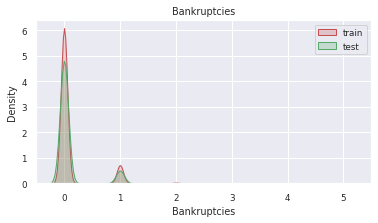

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


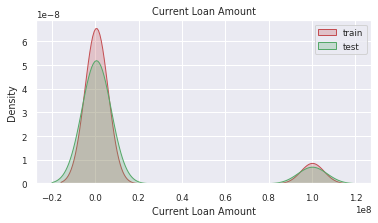

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


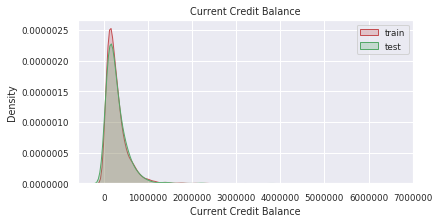

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


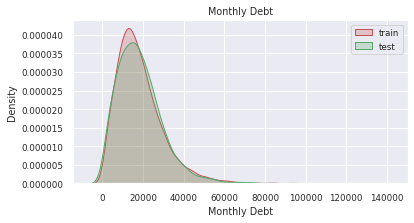

Credit Score
MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)


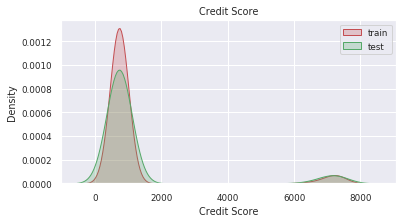

In [9]:
from scipy.stats import mannwhitneyu

figsize = (6, 3)
for col in corr_matrix.index:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(l2_train_data[col], shade=True, label='train', color='r')
    sns.kdeplot(l2_test_data[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(l2_train_data[col], l2_test_data[col]))
    plt.legend()
    plt.title(col)
    plt.show()

Выводы:
- поматричное визуальное сравнение матриц корреляций для train.csv и test.csv обнаруживает некоторую совместимость матриц;
- с использованием метода corrwith максимальная корреляция составляет 0.03 (по модулю), что весьма странно характеризует проведенную работу;
- следующий прием показывает, что "Tax Liens", "Maximum Open Credit", "Months since last delinquent", "Credit Score" имеют визуально значимые различия в распределениях, что может ухудшить результат прогнозирования;
- вероятно разделение признаков на вещественные и категорилаьные могут улучшить визуальные данные по распределению (проверка может быть проведена в будущих уроках, либо в курсовом проекте).

__3.__ Поизучайте значения на категориальных признаках и попробуйте сократить кол-во уникальных значений

In [10]:
l2d.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0


In [11]:
l2d['Tax Liens'].unique()

array([0., 3., 1., 2., 4., 6., 5., 7.])

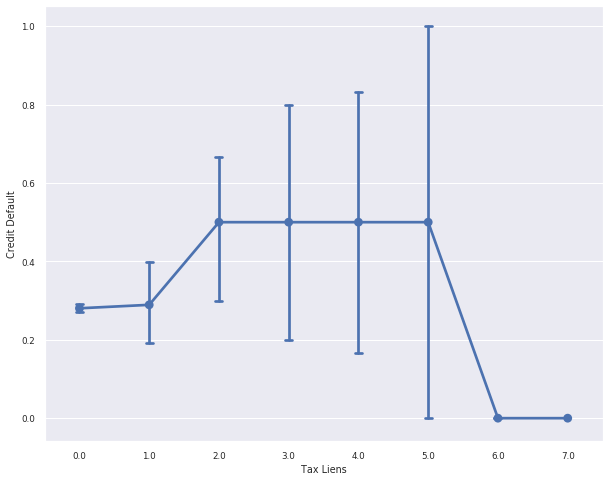

In [12]:
plt.figure(figsize=(10, 8))

sns.pointplot(x='Tax Liens', y=y, data=l2d, capsize=.1,);

In [13]:
def change_tax_liens(df):
    df.loc[df['Tax Liens'].isin([0, 1]), 'Tax Liens'] = 0
    df.loc[df['Tax Liens'].isin([2, 3, 4, 5]), 'Tax Liens'] = 1
    df.loc[df['Tax Liens'].isin([6, 7]), 'Tax Liens'] = 2
    return df

In [14]:
l2_test_data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


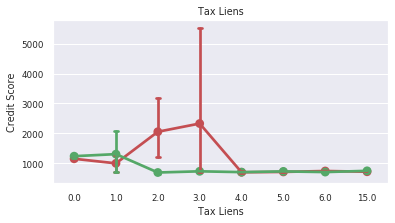

In [15]:
num_feature = 'Credit Score'
col = 'Tax Liens'
plt.figure(figsize=figsize)
sns.pointplot(x=col, y=num_feature, data=l2_train_data, capsize=.1, label='train', color='r')
sns.pointplot(x=col, y=num_feature, data=l2_test_data, capsize=.1, label='test', color='g')
plt.title(col)
plt.show()

In [16]:
l2_train_data = change_tax_liens(l2_train_data)
l2_test_data = change_tax_liens(l2_test_data)

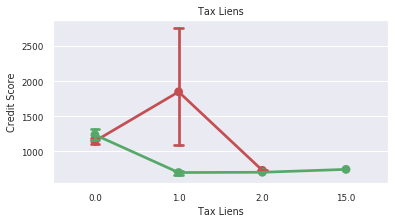

In [17]:
num_feature = 'Credit Score'
col = 'Tax Liens'
plt.figure(figsize=figsize)
sns.pointplot(x=col, y=num_feature, data=l2_train_data, capsize=.1, label='train', color='r')
sns.pointplot(x=col, y=num_feature, data=l2_test_data, capsize=.1, label='test', color='g')
plt.title(col)
plt.show()

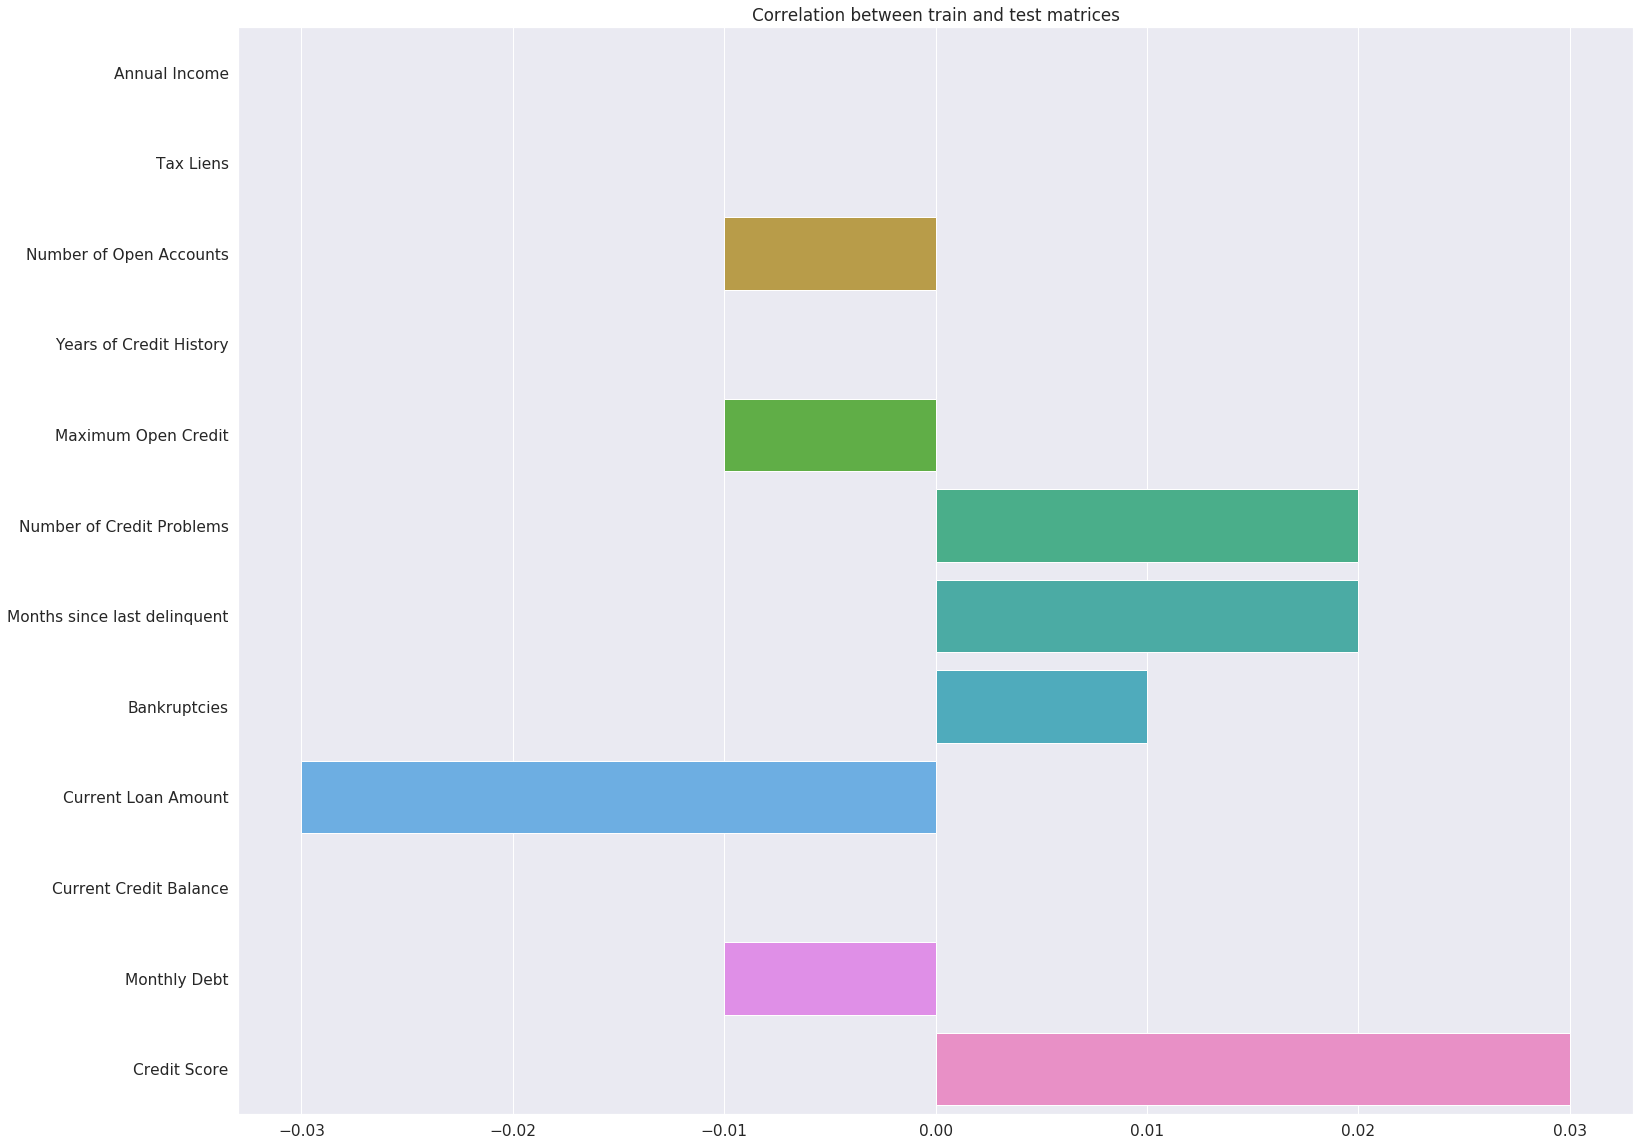

In [18]:
plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

corr_matrix = l2_train_data.corrwith(l2_test_data)
corr_matrix = np.round(corr_matrix, 2)

sns.barplot(x=corr_matrix.values, y=corr_matrix.index)

plt.title('Correlation between train and test matrices')
plt.show()

In [19]:
l2d['Number of Credit Problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

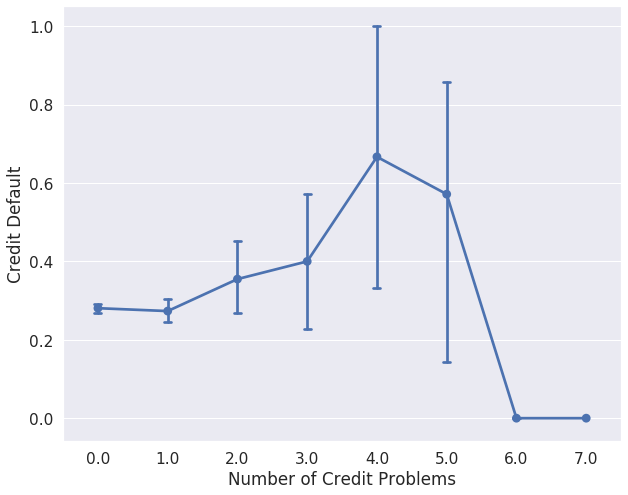

In [20]:
plt.figure(figsize=(10, 8))

sns.pointplot(x='Number of Credit Problems', y=y, data=l2d, capsize=.1,);

In [21]:
def change_number_of_credit_problems(df):
    df.loc[df['Tax Liens'].isin([0, 1]), 'Number of Credit Problems'] = 0
    df.loc[df['Tax Liens'].isin([2, 3]), 'Number of Credit Problems'] = 1
    df.loc[df['Tax Liens'].isin([4, 5]), 'Number of Credit Problems'] = 2
    df.loc[df['Tax Liens'].isin([6, 7]), 'Number of Credit Problems'] = 3
    return df

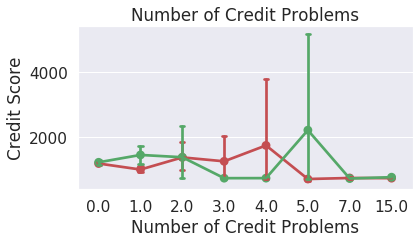

In [22]:
num_feature = 'Credit Score'
col = 'Number of Credit Problems'
plt.figure(figsize=figsize)
sns.pointplot(x=col, y=num_feature, data=l2_train_data, capsize=.1, label='train', color='r')
sns.pointplot(x=col, y=num_feature, data=l2_test_data, capsize=.1, label='test', color='g')
plt.title(col)
plt.show()

In [23]:
l2_train_data = change_number_of_credit_problems(l2_train_data)
l2_test_data = change_number_of_credit_problems(l2_test_data)

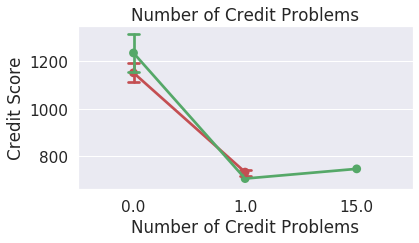

In [24]:
num_feature = 'Credit Score'
col = 'Number of Credit Problems'
plt.figure(figsize=figsize)
sns.pointplot(x=col, y=num_feature, data=l2_train_data, capsize=.1, label='train', color='r')
sns.pointplot(x=col, y=num_feature, data=l2_test_data, capsize=.1, label='test', color='g')
plt.title(col)
plt.show()

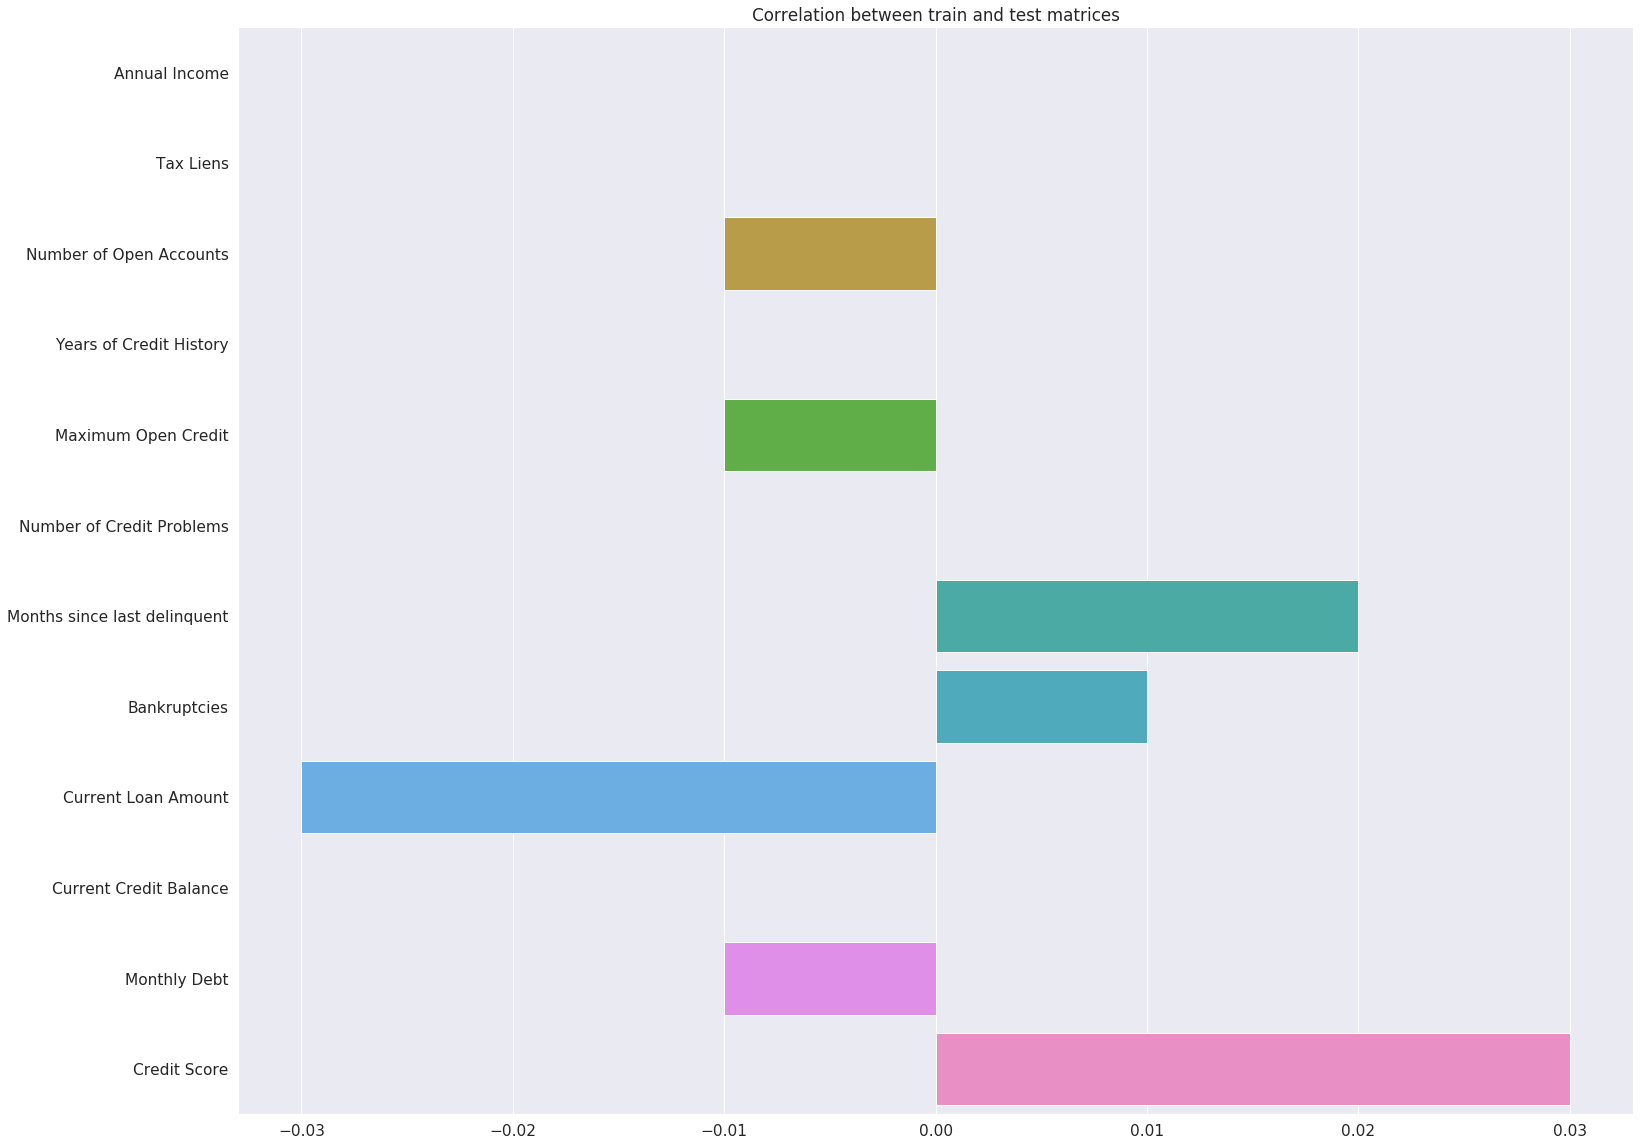

In [25]:
plt.figure(figsize=(25, 20))

sns.set(font_scale=1.4)

corr_matrix = l2_train_data.corrwith(l2_test_data)
corr_matrix = np.round(corr_matrix, 2)

sns.barplot(x=corr_matrix.values, y=corr_matrix.index)

plt.title('Correlation between train and test matrices')
plt.show()

In [26]:
l2d['Number of Open Accounts'].unique()

array([11., 15.,  8., 13., 12.,  9., 17., 10.,  7.,  6., 14.,  3., 20.,
       19., 22., 18.,  5., 16.,  4.,  2., 23., 24., 21., 25., 32., 33.,
       31., 30., 29., 28., 26., 27., 43., 41., 34., 38., 35., 37., 42.])

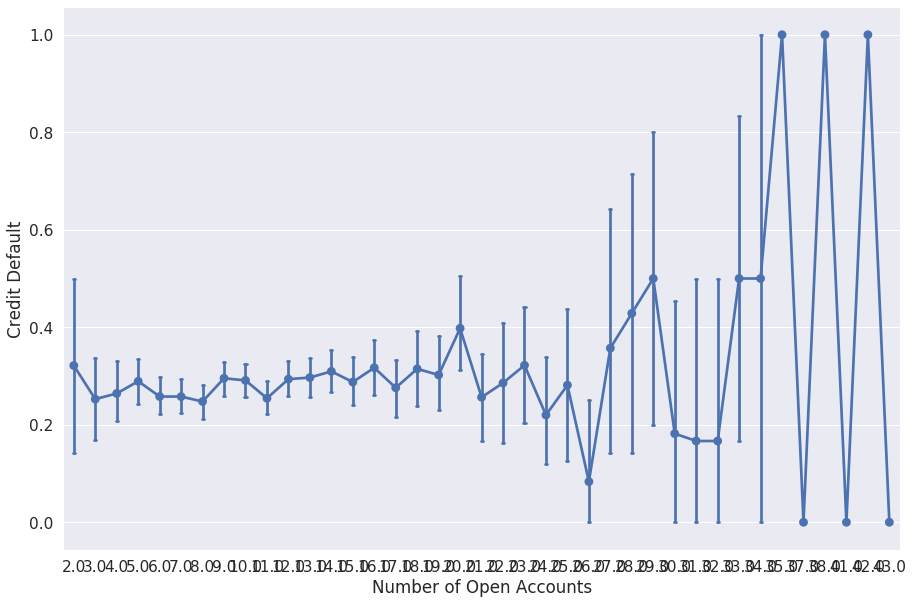

In [27]:
plt.figure(figsize=(15, 10))

sns.pointplot(x='Number of Open Accounts', y=y, data=l2d, capsize=.1,);

Выводы:
- уменьшение количества категорий в 'Tax Liens' не привело к ожидаемому результату, кроме того удивило, что не изменилась даже корреляция между таблицами train и test;
- уменьшение количества категорий в 'Number of Credit Problems' привело к ухудшению корреляции между таблицами train и test;
- не уверен, что 'Number of Open Accounts' подходит для уменьшения количества категорий.